
<font size="2">KINGDOM OF SAUDI ARABIA<br>
Ministry of Higher Education<br>
Al-Imam Mohammad University<br>
College of Computer & Information Sciences<br><br>
    <b>Artificial Intelligence (CS361)<br>
Instructor<br>
Prof. Hachemi BENNACEUR <br></b>
</font>
<br><font size="3">
**Omar Al-Khuwaytim (440013412)<br>
Abulrazag Al-Thuwaini (440017330)<br>
Abdulelah Al-Jarboa (440015920)<br>
Section: 171**
    </font>


# **Introduction**

This notebook is an AI project that's will explans constraint satisfaction problems (CSP).
A constraint satisfaction problem is defined as a triple <X,D,C>, where X is a set of variables, D is a domain of values, and C is a set of constraints C1(S1)...Cn(Sn) where each Si is a set of variables. A constraint Ci is a combination of valid values for the variables Si. A solution to the CSP is an assignment of values to S1...Sn that satisfies all constraints.

# An example problem that can be solved by the three algorithms:

# Sudoku Puzzle

**o Variables :** tiles where we have 81 variables in total <dt>

**o Domains :** { 1, 2, 3, 4, 5, 6, 7, 8, 9 }  <dt>

**o Constraints :**<dt> 
- each tile have to be different from the whole row <dt> 
- each tile have to be different from the whole column <dt>
- each tile have to be different from the whole block <dt>

**o Relations :**  <dt>
- R1 (tile[0][0],row 0) <dt>
- R2 (tile[0][0],colme 0) <dt>
- R3 (tile[0][0],block 1) <dt>
- R4 (tile[3][7],row 3) <dt>
- R5 (tile[3][7],colm 7) <dt>
- R6 (tile[3][7],block 3)
- etc

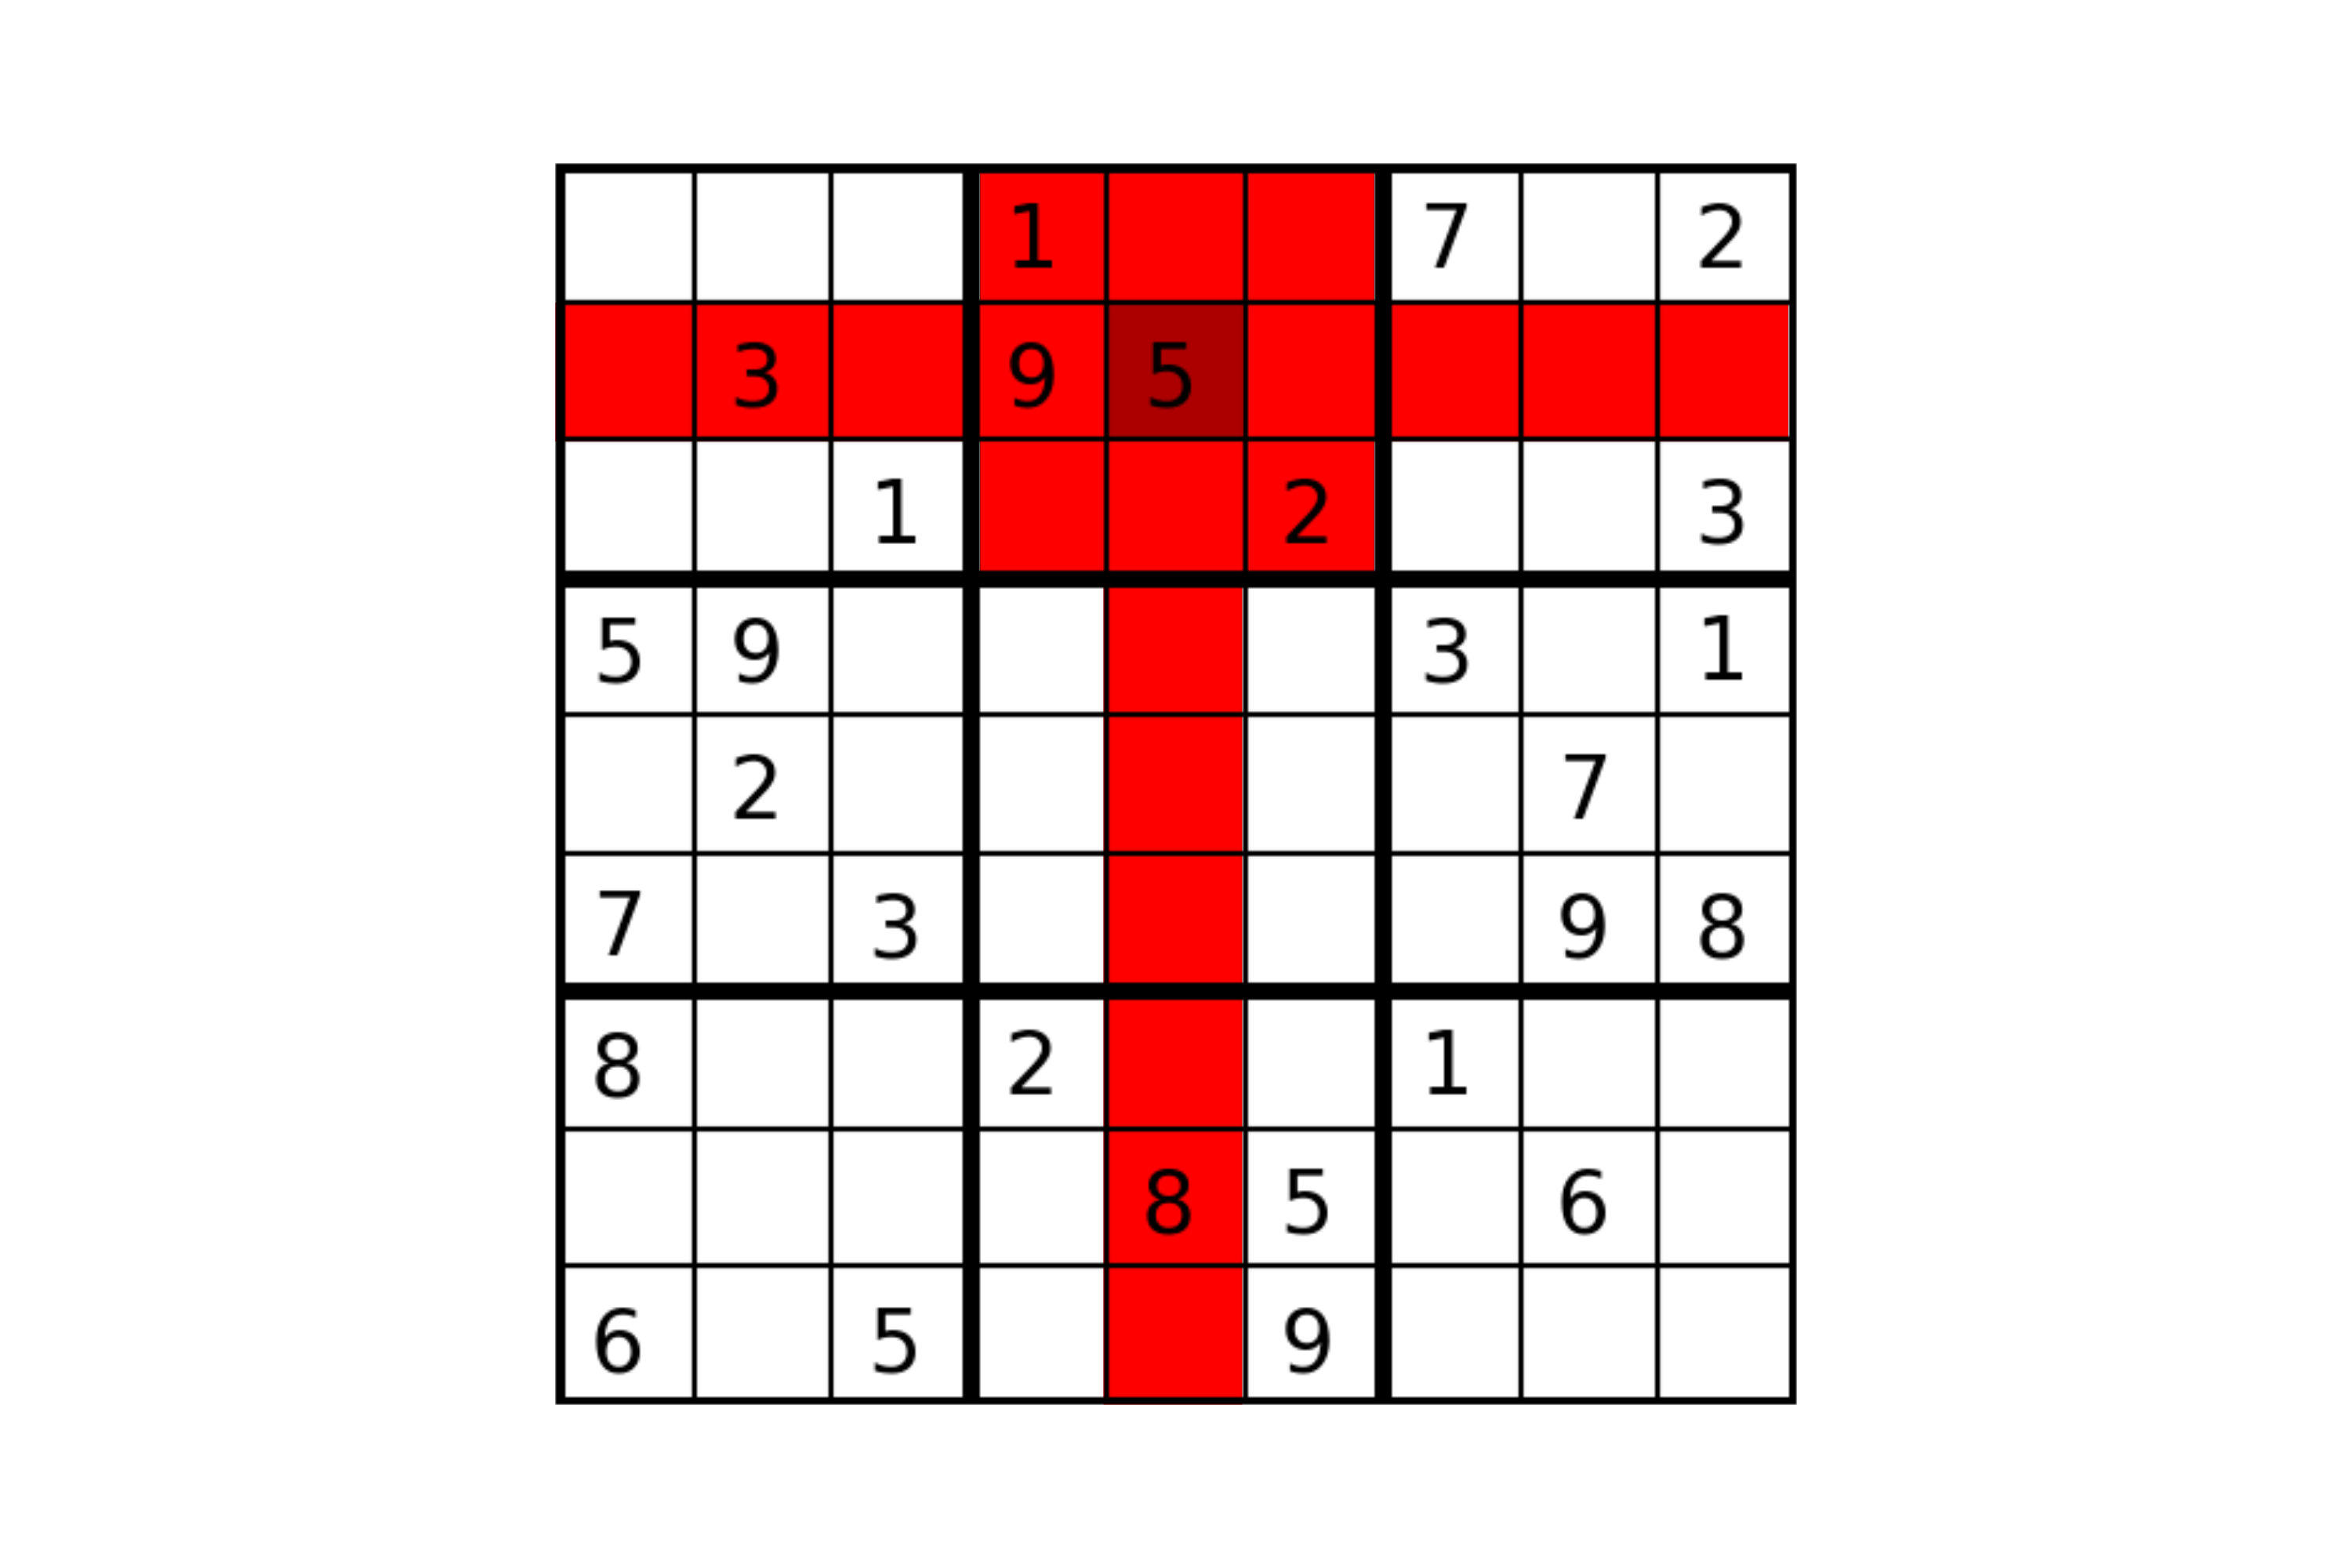

*Fig1 visual representation of the relations

**o Solution :**<dt>

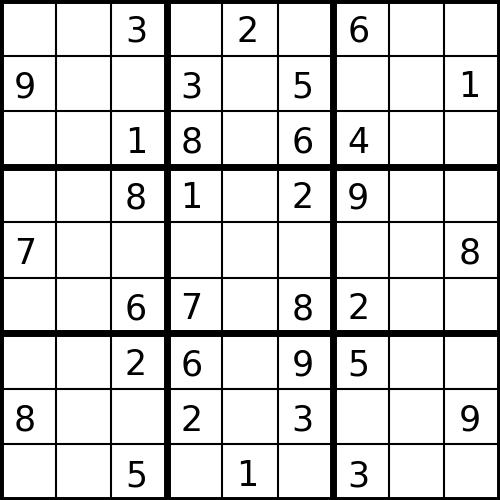

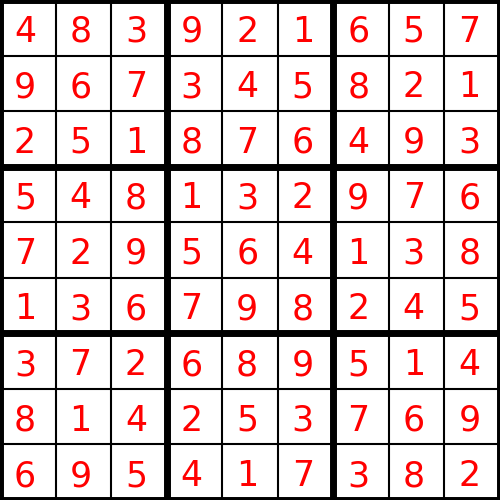

# The algorithims


# **Arc Consistency AC-3**

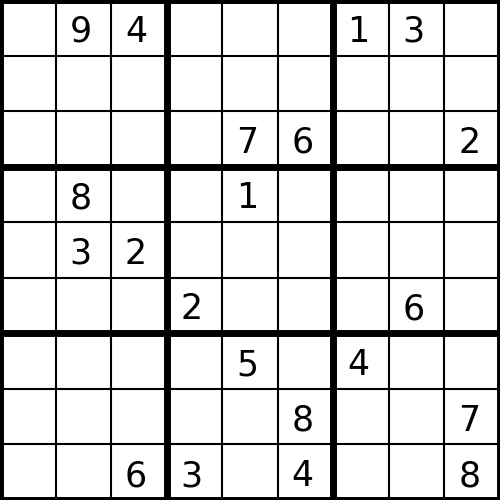

<font size="4"> **o Explanation :** <br></font>

AC-3 proceeds by examining the arcs between pairs of variables (x, y).
It removes those values from the domain of x which aren't consistent with the constraints between x and y. The algorithm keeps a collection of arcs that are yet to be checked; when the domain of a variable has any values removed, all the arcs of constraints pointing to that pruned variable (except the arc of the current constraint) are added to the collection. Since the domains of the variables are finite and either one arc or at least one value are removed at each step, this algorithm is guaranteed to terminate.


<font size="4">**o Implementation :** </font> <br>

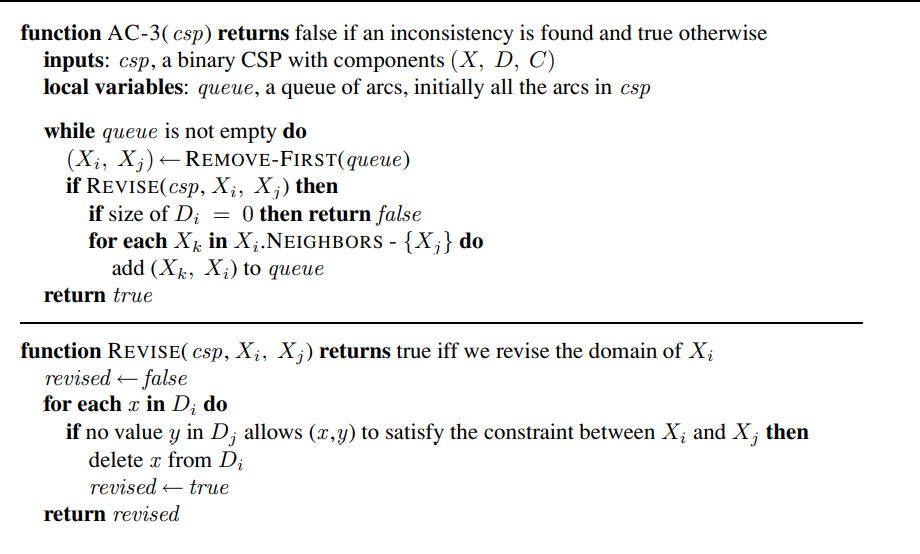

# **Backtracking with AC-3**

<font size="4"> **o Explanation :** <br>
is a type of a blind search algorithm that is used in Constraint Satisfaction Problem(CSP)that uses Depth First Search.
There are two types of backtracking search, the first passive where it does not have a way to start the search, the second one is Informed backtracking search where we take an active approach when it comes to searching. Examples of that will be Minimum Remaining Values(MRV) where we choose the variable with the fewest legal values. And the other example is Most Constraints Values(MCV) where we choose the variable with the most constraint on The remaining variables, the tie breaker will be the degree  of heuristic.<br>
Time complexity O(d^n)

<font size="4">**o Implementation :** </font> <br>

<font size="4">  **if AC-3(csp) {**

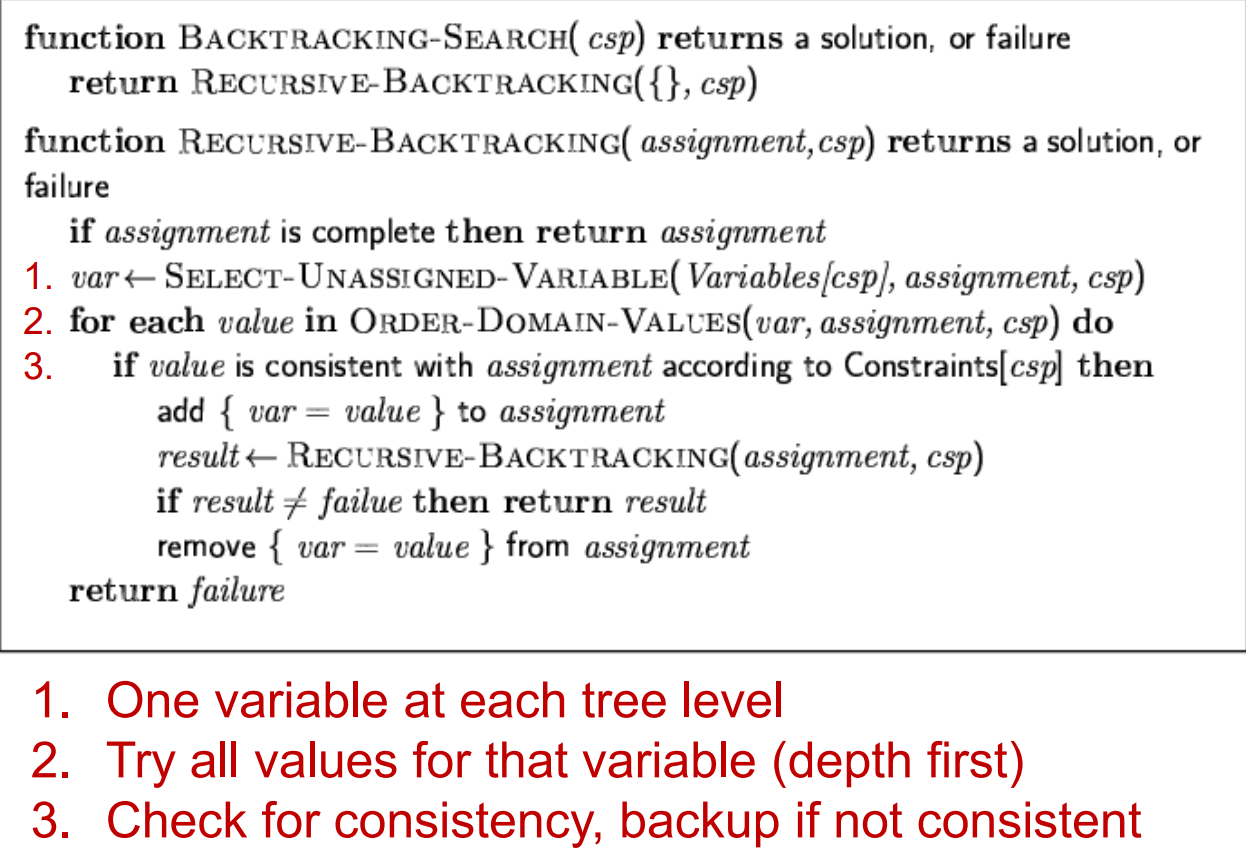

<font size="5"> **}**

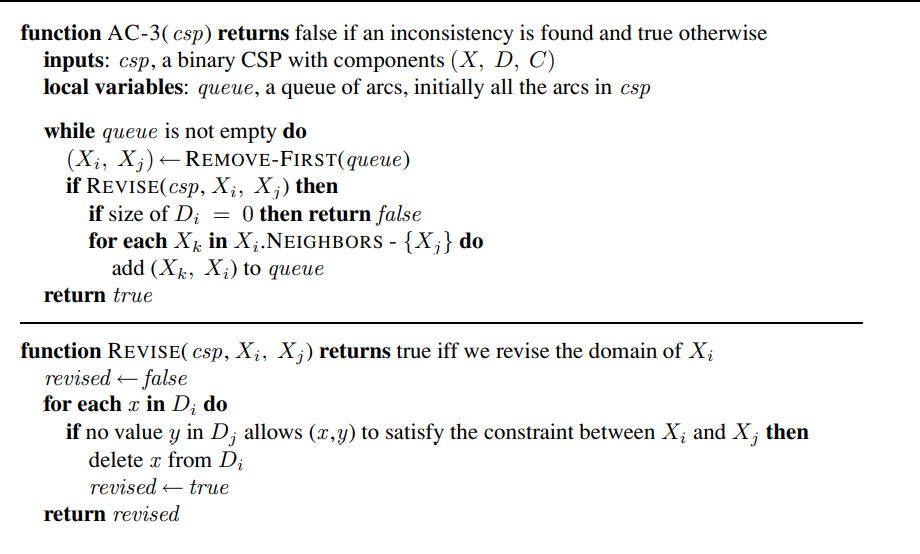

  <font size="4"> **o Applying the algorithm on the problem :** <br>

In [2]:
file = open('sudoku.txt', 'r')
read_for_file = file.readlines()

#Making the Puzzle Grid
def Make_grid(puzzle_As_string):
    global grid
    print('\nChoosen problem')
    for i in range(0, len(puzzle_As_string), 9): # loop through String in 9's and stop at the length of "puzzle_As_string".
        row = puzzle_As_string[i:i+9]
        temp = []
        for cell in row:
            temp.append(int(cell))
        grid.append(temp)    
    printGrid()


#check if a digit can be placed in the given block
def possible(row,col,digit):
    global grid
    for i in range(0,9): #check all cells in the row
        if grid[row][i] == digit:
            return False
    for i in range(0,9): #check all cells in the column
        if grid[i][col] == digit:
            return False
    square_row = (row//3)*3 #Floor div -- see where is the cell square row starting point
    square_col = (col//3)*3 #Floor div -- see where is the cell square column starting point
    for i in range(0,3):
        for j in range(0,3):
            if grid[square_row+i][square_col+j] == digit: #Is the number already used in the square?
                return False    
    return True

def solveCSP():
    global grid
    for row in range(9):
        for col in range(9):
            if grid[row][col] == 0: #if 0 then it is empty space
                for digit in range(1,10): #check all digits as a solution
                    if possible(row,col,digit):
                        grid[row][col] = digit
                        solveCSP()
                        grid[row][col] = 0  #Backtrack step
                return
    print('\nThe Solution')
    printGrid()


#Print 
def printGrid():
    global grid
    for row in grid:
        print(row)


num = int(input ("Enter The Board Number(from 1-5): "))
num-=1
list = []
for line in read_for_file:
    if line[-1] == "\n":
        list.append(str(line[:-1]))

#print(list[num])
puzzle_As_string = str(list[num])
grid = []
Make_grid(puzzle_As_string)
solveCSP()


Choosen problem
[0, 8, 3, 2, 0, 0, 0, 9, 6]
[2, 0, 0, 0, 3, 0, 7, 0, 4]
[0, 0, 7, 9, 1, 5, 0, 0, 0]
[4, 0, 2, 3, 9, 0, 0, 0, 8]
[0, 1, 0, 0, 0, 4, 0, 6, 0]
[0, 6, 9, 8, 7, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 0, 0, 0, 7]
[5, 0, 0, 0, 6, 0, 2, 8, 0]
[0, 7, 0, 0, 5, 0, 9, 0, 0]

The Solution
[1, 8, 3, 2, 4, 7, 5, 9, 6]
[2, 9, 5, 6, 3, 8, 7, 1, 4]
[6, 4, 7, 9, 1, 5, 8, 3, 2]
[4, 5, 2, 3, 9, 6, 1, 7, 8]
[7, 1, 8, 5, 2, 4, 3, 6, 9]
[3, 6, 9, 8, 7, 1, 4, 2, 5]
[9, 2, 1, 4, 8, 3, 6, 5, 7]
[5, 3, 4, 7, 6, 9, 2, 8, 1]
[8, 7, 6, 1, 5, 2, 9, 4, 3]


# **Forward Checking**

<font size="4"> **o Explanation** <br>
Forward checking detects the inconsistency earlier than simple backtracking and thus it allows branches of the search tree that will lead to failure to be pruned earlier than with simple backtracking. This reduces the search tree and (hopefully) the overall amount of work done.<br>
There is no propagation going until it reaches an empty domain or no solution then removes the starting variables from the domain. It keeps track of the remaining legal values for unassigned variables and Terminate search when any variable has no legal values


<font size="4">**o Implementation** </font> <br>

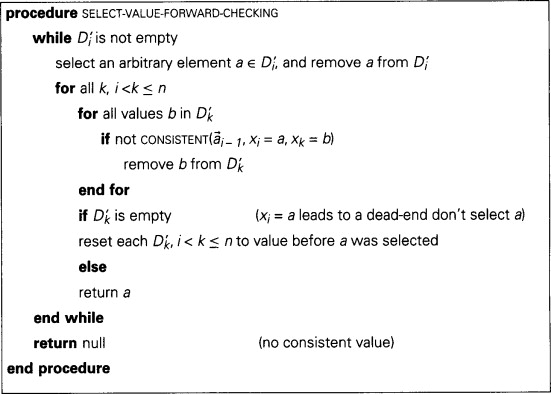

# References and resources

- Ariel, D. Procaccia (June 4, 2008) **Mathematical Foundations of AI** <dt> https://www.cs.cmu.edu/~arielpro/mfai_papers/lecture4.pdf<br>


- Stuart J., & Russell and Peter, Norvig (2010) **Artificial Intelligence - A Modern Approach (3rd Edition)** page 209<br>

- https://en.wikipedia.org/wiki/AC-3_algorithm#:~:text=The%20algorithm,values%20a%20variable%20may%20have. **AC-3** Explanation<br>


- Prof. Hachemi BENNACEUR, Dr. Areeb Alowisheq, **Artificial Intelligence (CS361): Lecture 6.1 CSP** , Imam Muhammad bin Saud Islamic university. <br>

- https://ktiml.mff.cuni.cz/~bartak/constraints/propagation.html and slides explnation **Forward checking**<br>

- **Introduction to Artificial Intelligence**<dt>
https://courses.cs.washington.edu/courses/cse473/19wi/notes/CSP2019.pdf <br>

- Dechter, Rina (2003) **General Search Strategies: Look-Ahead**<dt>
https://www.sciencedirect.com/topics/computer-science/forward-algorithm Forward Checking<dt>

-  DEY, SANDIPAN, (MARCH 17, 2017 **Solving Sudoku as a Constraint Satisfaction Problem using Constraint Propagation with Arc-Consistency Checking and then Backtracking with Minimum Remaining Value Heuristic and Forward Checking in Python**)<dt>
https://sandipanweb.wordpress.com/2017/03/17/solving-sudoku-as-a-constraint-satisfaction-problem-using-constraint-propagation-with-arc-consistency-checking-and-then-backtracking-with-minimum-remaning-value-heuristic-and-forward-checking/<dt>

- Sonawanehttps, Ajinkya (Feb 16, 2020) **Solving Sudoku Puzzle using Backtracking in Python | Daily Python #29**<dt>
 https://medium.com/daily-python/solving-sudoku-puzzle-using-backtracking-in-python-daily-python-29-99a825042e<dt>


